<a href="https://colab.research.google.com/github/HenriqueMAP/imersao-dados-3-alura/blob/main/Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafios da Imersão Dados 3ª Edição




## Aula 1: Python, Pandas e Pharmacia
### Desafio 01: Investigar o por quê da classe "tratamento" ser tão desbalanceada.
---
### Desafio 02: Plotar as 5 últimas linhas da tabela.
---
### Desafio 03: Proporção das classes de tratamento.
---
### Desafio 04: Quantos tipos de drogas foram investigados?
---
### Desafio 05: Procurar na documentação do Pandas sobre o método query.
---
### Desafio 06: Renomear as colunas removendo o hífen.
---
### Desafio 07: Melhorar a aparência dos gráficos, utilizando o matplotlib.pyplot.
---
### Desafio 08: Resumir o que você aprendeu.

## Resposta do Desafio 01: Investigar o por quê da classe "tratamento" ser tão desbalanceada.

### Quantidade de tratamentos utilizando drogas VS não utilizando drogas (com_controle)

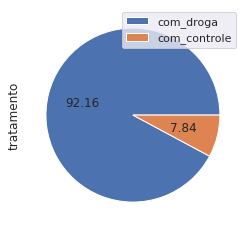

In [62]:
import pandas as pd
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
tipos_tratamentos = dados['tratamento'].value_counts().plot.pie(
    labels=None,
    autopct="%.2f",
    legend=True,
    figsize=(4, 4),
    )

Resposta (Parte 1): Embora a quantidade de tratamentos utilizando drogas seja igual a 21 948, em contrapartida, a quantidade de tratamentos sem drogas (com_controle) é igal a 1 866. A princípio parece ser uma desproporcionalidade, mas isso só fica visível dessa forma, porque a análise nesse ponto é rasa, superficial, e precisa ser aprofundada.

### Quantidade da utilização de cada tipo de substância / composto

In [63]:
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace = True)
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
32dccc366       1
d9fcbe12c       1
cf21e6ee0       1
23458e56a       1
57f5932fb       1
Name: composto, Length: 3289, dtype: int64

Resposta (Parte 2): Para aprofundar essa análise, é necessário identificar se existem mais de uma substância utilizadas no tratamento sem drogas. Neste caso, é possível identificar que a substância utilizada foi apenas a denominada cacb2b860. Note que ao contar quantas vezes ela é utilizada, encontramos o mesmo valor de 1866 utilizado quando verificamos quantos tratamentos foram realizados anteriormente. Confira abaixo que somente existe essa subtância quando filtramos a coluna de "tratamento" para o valor de "com_controle".

### Verificação de substâncias utilizadas no tratamento "com_controle"

In [64]:
comcontrole = dados.query('"com_controle" in tratamento')
comcontrole['composto'].unique()

array(['cacb2b860'], dtype=object)

### Quantidade de utilização das substâncias

In [65]:
pd.crosstab(dados['composto'], dados['tratamento'])

tratamento,com_controle,com_droga
composto,,
00199ff52,0,6
00251fc41,0,6
00321ea80,0,12
0034c0847,0,6
0060e686f,0,6
...,...,...
ff9565933,0,6
ffd66e220,0,6
ffe357f8f,0,1


Resposta (Parte 3): O método crosstab do Pandas retornou a quantidade de vezes que cada tipos de substância / droga foi utilizada nos 23 814 tratamentos. 

Desse valor, sabemos que precisamos subtrair a quantidade de tratamentos realizados sem drogas, que corresponde a 1866 tratamentos. 

Assim, restam 21 948, dos quais podemos verificar com o retorno acima que são exatamente 3288 drogas utilizadas, sendo que retiramos 1 do total de linhas que o cross tab retorna devido a substância do tratamento com controle.

E se utilizarmos dados['composto'].value_counts() podemos ver que a droga mais utilizada á a denominada como 87d714366, da qual é utilizada 718 vezes. 

Agora sabendo disso, percebemos que a quantidade de tratamentos não utilizando drogas foi maior que qualquer tratamento utilizando uma droga específica. Ou seja, não existe nenhuma desproporcionalidade.

In [66]:
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
32dccc366       1
d9fcbe12c       1
cf21e6ee0       1
23458e56a       1
57f5932fb       1
Name: composto, Length: 3289, dtype: int64

## Resposta do Desafio 02: Plotar as 5 últimas linhas da tabela.

In [67]:
dados.tail(5)

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g

## Resposta do Desafio 03: Proporção das classes de tratamento.

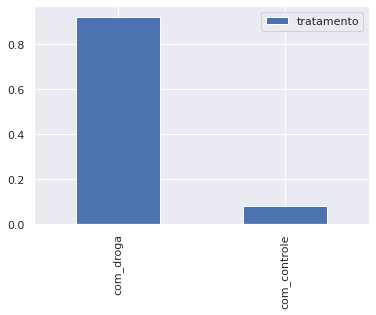

In [68]:
proporcao_tratamentos = dados['tratamento'].value_counts(normalize = True).plot.bar(legend=True)

## Resposta do Desafio 04: Quantos tipos de drogas foram investigados?

Conforme mostrado na célula abaixo, temos um total de 3289 compostos = 3288 drogas + 1 substância para tratamento sem drogas (cacb2b860).

In [69]:
dados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
32dccc366       1
d9fcbe12c       1
cf21e6ee0       1
23458e56a       1
57f5932fb       1
Name: composto, Length: 3289, dtype: int64

## Resposta do Desafio 05: Procurar na documentação do Pandas sobre o método query.

In [70]:
comcontrole = dados.query('"com_controle" in tratamento')
comcontrole['composto'].unique()

array(['cacb2b860'], dtype=object)

## Resposta do Desafio 06: Renomear as colunas removendo o hífen.

In [71]:
number = 0
colunas = list(dados.columns)
titulo=[]
for number in range(number,len(colunas)):
  titulo.append(colunas[number].replace("-", " "))
  mapa={str(colunas[number]):str(titulo[number])}
  dados.rename(columns=mapa, inplace=True)
  number += 1

dados.head()

,id,tratamento,tempo,dose,composto,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,g 39,g 40,g 41,g 42,g 43,g 44,g 45,g 46,g 47,g 48,g 49,g 50,g 51,g 52,g 53,g 54,g 55,g 56,g 57,g 58,g 59,g 60,g 61,g 62,g 63,g 64,g 65,g 66,g 67,g 68,g 69,g 70,g 71,g 72,g 73,g 74,g 75,g 76,g 77,g 78,g 79,g 80,g 81,g 82,g 83,g 84,g 85,g 86,g 87,g 88,g 89,g 90,g 91,g 92,g 93,g 94,g 95,g 96,g 97,g 98,g 99,g 100,g 101,g 102,g 103,g 104,g 105,g 106,g 107,g 108,g 109,g 110,g 111,g 112,g 113,g 114,g 115,g 116,g 117,g 118,g 119,g 120,g 121,g 122,g 123,g 124,g 125,g 126,g 127,g 128,g 129,g 130,g 131,g 132,g 133,g 134,g 135,g 136,g 137,g 138,g 139,g 140,g 141,g 142,g 143,g 144,g 145,g 146,g 147,g 148,g 149,g 150,g 151,g 152,g 153,g 154,g 155,g 156,g 157,g 158,g 159,g 160,g 161,g 162,g 163,g 164,g 165,g 166,g 167,g 168,g 169,g 170,g 171,g 172,g 173,g 174,g 175,g 176,g 177,g 178,g 179,g 180,g 181,g 182,g 183,g 184,g 185,g 186,g 187,g 188,g 189,g 190,g 191,g 192,g 193,g 194,g 195,g 196,g 197,g 198,g 199,g 200,g 201,g 202,g 203,g 204,g 205,g 206,g 207,g 208,g 209,g 210,g 211,g 212,g 213,g 214,g 215,g 216,g 217,g 218,g 219,g 220,g 221,g 222,g 223,g 224,g 225,g 226,g 227,g 228,g 229,g 230,g 231,g 232,g 233,g 234,g 235,g 236,g 237,g 238,g 239,g 240,g 241,g 242,g 243,g 244,g 245,g 246,g 247,g 248,g 249,g 250,g 251,g 252,g 253,g 254,g 255,g 256,g 257,g 258,g 259,g 260,g 261,g 262,g 263,g 264,g 265,g 266,g 267,g 268,g 269,g 270,g 271,g 272,g 273,g 274,g 275,g 276,g 277,g 278,g 279,g 280,g 281,g 282,g 283,g 284,g 285,g 286,g 287,g 288,g 289,g 290,g 291,g 292,g 293,g 294,g 295,g 296,g 297,g 298,g 299,g 300,g 301,g 302,g 303,g 304,g 305,g 306,g 307,g 308,g 309,g 310,g 311,g 312,g 313,g 314,g 315,g 316,g 317,g 318,g 319,g 320,g 321,g 322,g 323,g 324,g 325,g 326,g 327,g 328,g 329,g 330,g 331,g 332,g 333,g 334,g 335,g 336,g 337,g 338,g 339,g 340,g 341,g 342,g 343,g 344,g 345,g 346,g 347,g 348,g 349,g 350,g 351,g 352,g 353,g 354,g 355,g 356,g 357,g 358,g 359,g 360,g 361,g 362,g 363,g 364,g 365,g 366,g 367,g 368,g 369,g 370,g 371,g 372,g 373,g 374,g 375,g 376,g 377,g 378,g 379,g 380,g 381,g 382,g 383,g 384,g 385,g 386,g 387,g 388,g 389,g 390,g 391,g 392,g 393,g 394,g 395,g 396,g 397,g 398,g 399,g 400,g 401,g 402,g 403,g 404,g 405,g 406,g 407,g 408,g 409,g 410,g 411,g 412,g 413,g 414,g 415,g 416,g 417,g 418,g 419,g 420,g 421,g 422,g 423,g 424,g 425,g 426,g 427,g 428,g 429,g 430,g 431,g 432,g 433,g 434,g 435,g 436,g 437,g 438,g 439,g 440,g 441,g 442,g 443,g 444,g 445,g 446,g 447,g 448,g 449,g 450,g 451,g 452,g 453,g 454,g 455,g 456,g 457,g 458,g 459,g 460,g 461,g 462,g 463,g 464,g 465,g 466,g 467,g 468,g 469,g 470,g 471,g 472,g 473,g 474,g 475,g 476,g 477,g 478,g 479,g 480,g 481,g 482,g 483,g 484,g 485,g 486,g 487,g 488,g 489,g 490,g 491,g 492,g 493,g 494,g 495,g 496,g 497,g 498,g 499,g 500,g 501,g 502,g 503,g 504,g 505,g 506,g 507,g 508,g 509,g 510,g 511,g 512,g 513,g 514,g 515,g 516,g 517,g 518,g 519,g 520,g 521,g 522,g 523,g 524,g 525,g 526,g 527,g 528,g 529,g 530,g 531,g 532,g 533,g 534,g 535,g 536,g 537,g 538,g 539,g 540,g 541,g 542,g 543,g 544,g 545,g 546,g 547,g 548,g 549,g 550,g 551,g 552,g 553,g 554,g 555,g 556,g 557,g 558,g 559,g 560,g 561,g 562,g 563,g 564,g 565,g 566,g 567,g 568,g 569,g 570,g 571,g 572,g 573,g 574,g 575,g 576,g 577,g 578,g 579,g 580,g 581,g 582,g 583,g 584,g 585,g 586,g 587,g 588,g 589,g 590,g 591,g 592,g 593,g 594,g 595,g 596,g 597,g 598,g 599,g 600,g 601,g 602,g 603,g 604,g 605,g 606,g 607,g 608,g 609,g 610,g 611,g 612,g 613,g 614,g 615,g 616,g 617,g 618,g 619,g 620,g 621,g 622,g 623,g 624,g 625,g 626,g 627,g 628,g 629,g 630,g 631,g 632,g 633,g 634,g 635,g 636,g 637,g 638,g 639,g 640,g 641,g 642,g 643,g 644,g 645,g 646,g 647,g 648,g 649,g 650,g 651,g 652,g 653,g 654,g 655,g 656,g 657,g 658,g 659,g 660,g 661,g 662,g 663,g 664,g 665,g 666,g 667,g 668,g 669,g 670,g 671,g 672,g 673,g 674,g 675,g 676,g 677,g 678,g

## Resposta do Desafio 07: Melhorar a aparência dos gráficos, utilizando o matplotlib.pyplot


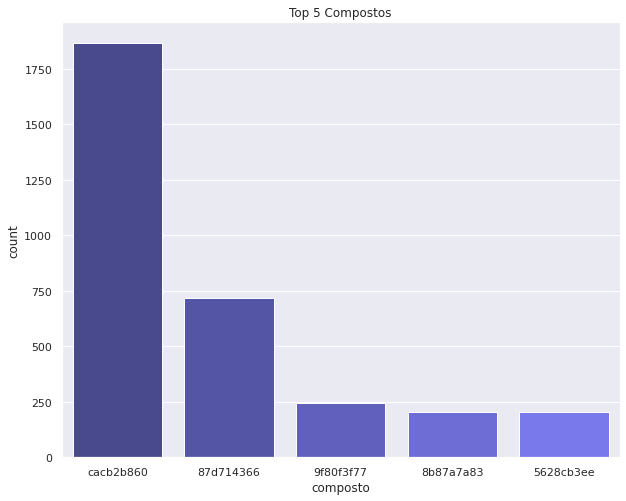

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
cod_compostos = dados['composto'].value_counts().index[0:5]
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'),  order=cod_compostos, palette=('#3d3d99', '#4747b3', '#5252cc','#5c5ce6', '#6666ff'))
ax.set_title('Top 5 Compostos')
plt.show()

## Aula 2: Estatísticas, dados e distribuições
### Desafio 01: Ordenar o gráfico countplot.
---
### Desafio 02: Alterar o tamanho da fonte.
---
### Desafio 03: Plotar os histogramas com seaborn.
---
### Desafio 04: Estudar sobre as estatísticas retornadas no método describe().
---
### Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.
---
### Desafio 06: Realizar outras análises com o boxplot e até com o histograma.


## Resposta do Desafio 01: Ordenar o gráfico countplot.

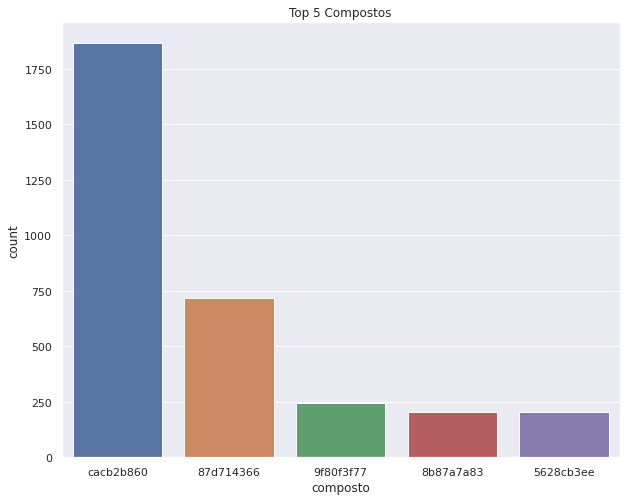

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos)
ax.set_title('Top 5 Compostos')
plt.show()

## Resposta do Desafio 02: Alterar o tamanho da fonte.

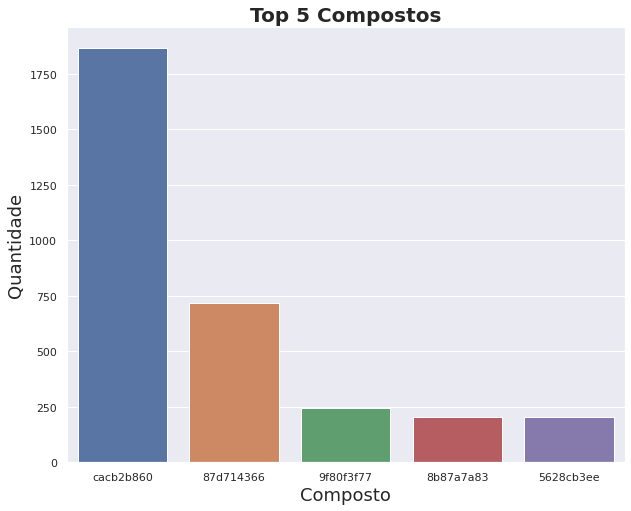

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos)
ax.set_title('Top 5 Compostos',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xlabel('Composto',fontdict= { 'fontsize': 18})
plt.ylabel('Quantidade',fontdict= { 'fontsize': 18})
plt.show()

## Resposta do Desafio 03: Plotar os histogramas com seaborn

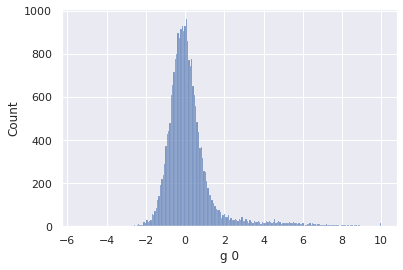

In [75]:
sns.histplot(data=dados['g 0'], bins='auto')

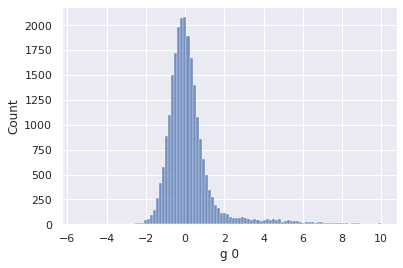

In [76]:
sns.histplot(data=dados['g 0'], bins=100, common_norm=True)

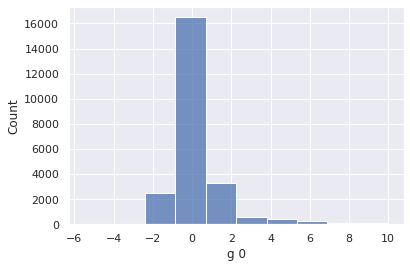

In [77]:
sns.histplot(data=dados['g 0'], bins=10)

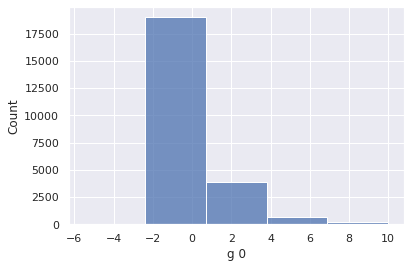

In [78]:
sns.histplot(data=dados['g 0'], bins=5)

## Resposta do Desafio 04: Estudar sobre as estatísticas retornadas no método describe().

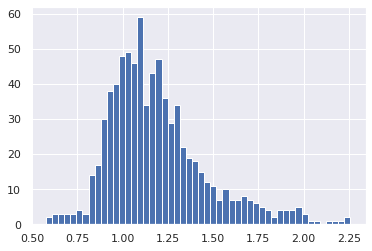

In [79]:
dados.loc[:, 'g 0':'g 771'].describe().T['std'].hist(bins=50)

## Resposta do Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.

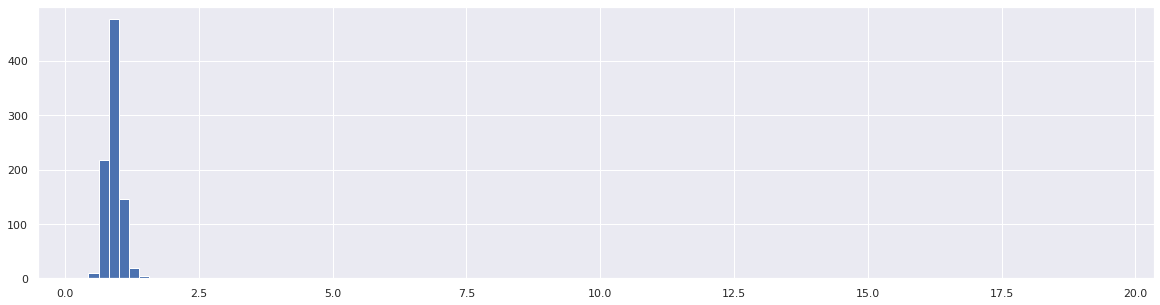

In [80]:
dados.query('"cacb2b860" in composto').describe().T['std'].hist(bins=100, figsize=(20,5))

A manipulação do tamanho das visualizações, realizada no atributo "bins", significa alterar a "resolucão" da frequência de desvios padrões (std), conforme visto no desafio anterior. Neste desafio, estamos analisando apenas o composto do tratamento com controle e, embora não conseguimos ampliar a visualização para visualizar com certeza os valores, eles estão no mesmo intervalo que o gráfico anterior. 

In [81]:
list(dados.query('"cacb2b860" in composto').describe().T['std'])

[19.395100227817395,
 0.8332481539156409,
 0.9057347986137461,
 1.016180610316052,
 0.8879711320869217,
 1.078824522651477,
 1.1316367816445088,
 0.9637180840850722,
 0.9825247703325074,
 0.7679786567439839,
 0.8822278521324616,
 0.986555378804893,
 0.8862753679371456,
 1.1928980039920096,
 0.8464410050421339,
 0.9071438567466061,
 0.642327885306669,
 1.0212179017466534,
 0.8852057333498704,
 0.6109680674704318,
 0.8480719608131905,
 0.9154842935273128,
 1.007721254703352,
 0.6892804337580065,
 0.7627105629823439,
 0.9713969127093868,
 0.7219658376263112,
 0.9392476443381536,
 1.0207880931810394,
 0.7323978034720251,
 0.8837147510627392,
 0.7791599518662816,
 0.93132771143835,
 0.8584598987826185,
 0.9389712799588733,
 0.8266170979458355,
 0.9102178104297619,
 0.986240506285857,
 0.8973154206713394,
 1.0080006552127259,
 0.7574851417456565,
 0.8388080695080599,
 0.8245744758973849,
 1.0271302454009494,
 0.9725647971698854,
 0.9182475312865249,
 1.197631319685567,
 0.5473361680679555,
 

## Resposta do Desafio 06: Realizar outras análises com o boxplot e até com o histograma.

In [82]:
list(dados.query('"cacb2b860" in composto').describe().T['std'].unique())

[19.395100227817395,
 0.8332481539156409,
 0.9057347986137461,
 1.016180610316052,
 0.8879711320869217,
 1.078824522651477,
 1.1316367816445088,
 0.9637180840850722,
 0.9825247703325074,
 0.7679786567439839,
 0.8822278521324616,
 0.986555378804893,
 0.8862753679371456,
 1.1928980039920096,
 0.8464410050421339,
 0.9071438567466061,
 0.642327885306669,
 1.0212179017466534,
 0.8852057333498704,
 0.6109680674704318,
 0.8480719608131905,
 0.9154842935273128,
 1.007721254703352,
 0.6892804337580065,
 0.7627105629823439,
 0.9713969127093868,
 0.7219658376263112,
 0.9392476443381536,
 1.0207880931810394,
 0.7323978034720251,
 0.8837147510627392,
 0.7791599518662816,
 0.93132771143835,
 0.8584598987826185,
 0.9389712799588733,
 0.8266170979458355,
 0.9102178104297619,
 0.986240506285857,
 0.8973154206713394,
 1.0080006552127259,
 0.7574851417456565,
 0.8388080695080599,
 0.8245744758973849,
 1.0271302454009494,
 0.9725647971698854,
 0.9182475312865249,
 1.197631319685567,
 0.5473361680679555,
 

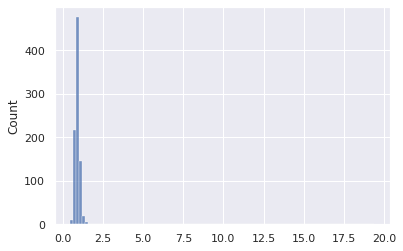

In [83]:
sns.histplot(data=dados.query('"cacb2b860" in composto').describe().T['std'].unique(), bins=100)

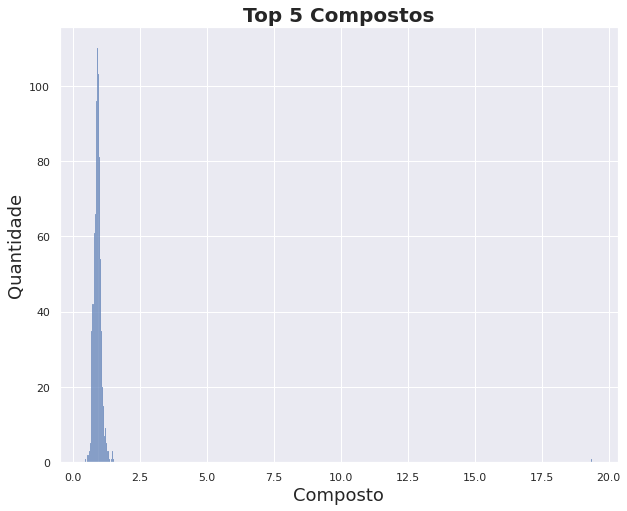

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
ax = sns.histplot(data=dados.query('"cacb2b860" in composto').describe().T['std'].unique(), bins='auto')
ax.set_title('Top 5 Compostos',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xlabel('Composto',fontdict= { 'fontsize': 18})
plt.ylabel('Quantidade',fontdict= { 'fontsize': 18})
## plt.xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

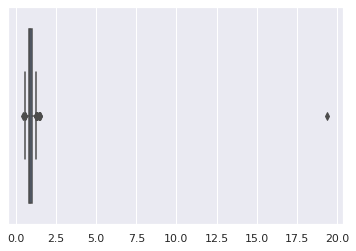

In [85]:
sns.boxplot(x=dados.query('"cacb2b860" in composto').describe().T['std'].unique(), data=dados.query('"cacb2b860" in composto'))

In [86]:
dados.query('"cacb2b860" in composto').describe().T['std']

tempo    19.395100
g 0       0.833248
g 1       0.905735
g 2       1.016181
g 3       0.887971
           ...    
c 95      0.694797
c 96      0.740021
c 97      0.754283
c 98      0.620762
c 99      0.698150
Name: std, Length: 873, dtype: float64

In [87]:
dados.query('"cacb2b860" in composto').describe()

,tempo,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,g 39,g 40,g 41,g 42,g 43,g 44,g 45,g 46,g 47,g 48,g 49,g 50,g 51,g 52,g 53,g 54,g 55,g 56,g 57,g 58,g 59,g 60,g 61,g 62,g 63,g 64,g 65,g 66,g 67,g 68,g 69,g 70,g 71,g 72,g 73,g 74,g 75,g 76,g 77,g 78,g 79,g 80,g 81,g 82,g 83,g 84,g 85,g 86,g 87,g 88,g 89,g 90,g 91,g 92,g 93,g 94,g 95,g 96,g 97,g 98,g 99,g 100,g 101,g 102,g 103,g 104,g 105,g 106,g 107,g 108,g 109,g 110,g 111,g 112,g 113,g 114,g 115,g 116,g 117,g 118,g 119,g 120,g 121,g 122,g 123,g 124,g 125,g 126,g 127,g 128,g 129,g 130,g 131,g 132,g 133,g 134,g 135,g 136,g 137,g 138,g 139,g 140,g 141,g 142,g 143,g 144,g 145,g 146,g 147,g 148,g 149,g 150,g 151,g 152,g 153,g 154,g 155,g 156,g 157,g 158,g 159,g 160,g 161,g 162,g 163,g 164,g 165,g 166,g 167,g 168,g 169,g 170,g 171,g 172,g 173,g 174,g 175,g 176,g 177,g 178,g 179,g 180,g 181,g 182,g 183,g 184,g 185,g 186,g 187,g 188,g 189,g 190,g 191,g 192,g 193,g 194,g 195,g 196,g 197,g 198,g 199,g 200,g 201,g 202,g 203,g 204,g 205,g 206,g 207,g 208,g 209,g 210,g 211,g 212,g 213,g 214,g 215,g 216,g 217,g 218,g 219,g 220,g 221,g 222,g 223,g 224,g 225,g 226,g 227,g 228,g 229,g 230,g 231,g 232,g 233,g 234,g 235,g 236,g 237,g 238,g 239,g 240,g 241,g 242,g 243,g 244,g 245,g 246,g 247,g 248,g 249,g 250,g 251,g 252,g 253,g 254,g 255,g 256,g 257,g 258,g 259,g 260,g 261,g 262,g 263,g 264,g 265,g 266,g 267,g 268,g 269,g 270,g 271,g 272,g 273,g 274,g 275,g 276,g 277,g 278,g 279,g 280,g 281,g 282,g 283,g 284,g 285,g 286,g 287,g 288,g 289,g 290,g 291,g 292,g 293,g 294,g 295,g 296,g 297,g 298,g 299,g 300,g 301,g 302,g 303,g 304,g 305,g 306,g 307,g 308,g 309,g 310,g 311,g 312,g 313,g 314,g 315,g 316,g 317,g 318,g 319,g 320,g 321,g 322,g 323,g 324,g 325,g 326,g 327,g 328,g 329,g 330,g 331,g 332,g 333,g 334,g 335,g 336,g 337,g 338,g 339,g 340,g 341,g 342,g 343,g 344,g 345,g 346,g 347,g 348,g 349,g 350,g 351,g 352,g 353,g 354,g 355,g 356,g 357,g 358,g 359,g 360,g 361,g 362,g 363,g 364,g 365,g 366,g 367,g 368,g 369,g 370,g 371,g 372,g 373,g 374,g 375,g 376,g 377,g 378,g 379,g 380,g 381,g 382,g 383,g 384,g 385,g 386,g 387,g 388,g 389,g 390,g 391,g 392,g 393,g 394,g 395,g 396,g 397,g 398,g 399,g 400,g 401,g 402,g 403,g 404,g 405,g 406,g 407,g 408,g 409,g 410,g 411,g 412,g 413,g 414,g 415,g 416,g 417,g 418,g 419,g 420,g 421,g 422,g 423,g 424,g 425,g 426,g 427,g 428,g 429,g 430,g 431,g 432,g 433,g 434,g 435,g 436,g 437,g 438,g 439,g 440,g 441,g 442,g 443,g 444,g 445,g 446,g 447,g 448,g 449,g 450,g 451,g 452,g 453,g 454,g 455,g 456,g 457,g 458,g 459,g 460,g 461,g 462,g 463,g 464,g 465,g 466,g 467,g 468,g 469,g 470,g 471,g 472,g 473,g 474,g 475,g 476,g 477,g 478,g 479,g 480,g 481,g 482,g 483,g 484,g 485,g 486,g 487,g 488,g 489,g 490,g 491,g 492,g 493,g 494,g 495,g 496,g 497,g 498,g 499,g 500,g 501,g 502,g 503,g 504,g 505,g 506,g 507,g 508,g 509,g 510,g 511,g 512,g 513,g 514,g 515,g 516,g 517,g 518,g 519,g 520,g 521,g 522,g 523,g 524,g 525,g 526,g 527,g 528,g 529,g 530,g 531,g 532,g 533,g 534,g 535,g 536,g 537,g 538,g 539,g 540,g 541,g 542,g 543,g 544,g 545,g 546,g 547,g 548,g 549,g 550,g 551,g 552,g 553,g 554,g 555,g 556,g 557,g 558,g 559,g 560,g 561,g 562,g 563,g 564,g 565,g 566,g 567,g 568,g 569,g 570,g 571,g 572,g 573,g 574,g 575,g 576,g 577,g 578,g 579,g 580,g 581,g 582,g 583,g 584,g 585,g 586,g 587,g 588,g 589,g 590,g 591,g 592,g 593,g 594,g 595,g 596,g 597,g 598,g 599,g 600,g 601,g 602,g 603,g 604,g 605,g 606,g 607,g 608,g 609,g 610,g 611,g 612,g 613,g 614,g 615,g 616,g 617,g 618,g 619,g 620,g 621,g 622,g 623,g 624,g 625,g 626,g 627,g 628,g 629,g 630,g 631,g 632,g 633,g 634,g 635,g 636,g 637,g 638,g 639,g 640,g 641,g 642,g 643,g 644,g 645,g 646,g 647,g 648,g 649,g 650,g 651,g 652,g 653,g 654,g 655,g 656,g 657,g 658,g 659,g 660,g 661,g 662,g 663,g 664,g 665,g 666,g 667,g 668,g 669,g 670,g 671,g 672,g 673,g 674,g 675,g 676,g 677,g 678,g 679,g 680,g 681,g 682,g 683

In [88]:
dados.query('"cacb2b860" in composto')

id    tratamento  tempo dose   composto     g 0     g 1  \
25     id_0054388ec  com_controle     48   D1  cacb2b860 -0.6696 -0.2718   
38     id_0079af0fb  com_controle     24   D1  cacb2b860 -0.1636 -1.8230   
40     id_007bfbb91  com_controle     24   D2  cacb2b860 -1.3200 -1.7340   
47     id_008a986b7  com_controle     48   D2  cacb2b860  0.4860  0.1430   
63     id_009d8340f  com_controle     24   D2  cacb2b860  0.4471 -0.0839   
...             ...           ...    ...  ...        ...     ...     ...   
23729  id_ff1f9e5fc  com_controle     24   D1  cacb2b860  0.0465  0.6430   
23747  id_ff469c482  com_controle     72   D1  cacb2b860 -0.6204 -1.3800   
23768  id_ff89331ca  com_controle     72   D2  cacb2b860 -0.1051  0.4335   
23793  id_ffd26f361  com_controle     48   D2  cacb2b860  0.6008  0.2781   
23811  id_fffc1c3f4  com_controle     48   D2  cacb2b860  0.3942  0.3756   

          g 2     g 3     g 4     g 5     g 6     g 7     g 8     g 9    g 10  \
25    -1.2230 -0.6226 -0.7220  0.1588  0.7785  0.7062 -0.7951  1.3770  0.2856   
38    -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400  0.2721 -0.2479   
40    -0.0741  1.5440 -1.8290 -0.0951  0.3829 -1.8700 -0.0324  2.7670 -0.0438   
47     0.5281 -0.0022 -0.2334 -0.6607  0.6459 -0.0109  1.0120 -0.0864 -0.3817   
63    -0.3864  0.3196  0.2584 -0.3156 -0.1187  1.1610  0.5838 -0.2996 -0.3995   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23729 -0.2453  0.3521  0.6195 -0.6659  0.8263  0.5933  0.1388 -0.2246 -0.6127   
23747 -1.1880 -0.6573 -0.8408 -0.2447  1.3490 -0.5155  1.2610 -0.1790 -0.7182   
23768  0.3648 -0.0525 -0.3632 -0.3228 -2.3190 -0.5294  0.1878  0.5047  1.3820   
23793 -0.3319 -0.8782  0.9281  0.7535  0.5971  1.6350 -0.3146  0.4984 -1.1890   
23811  0.3109 -0.7389  0.5505 -0.0159 -0.2541  0.1745 -0.0340  0.4865 -0.1854   

         g 11    g 12    g 13    g 14    g 15    g 16    g 17    g 18    g 19  \
25    -0.8331  0.3879  1.3290 -0.4746  0.0857 -0.2745 -0.1093  0.2603  0.7386   
38     0.0761 -0.4054  2.9760 -0.7679  0.6995  0.0752  0.5943  0.4266  0.0000   
40    -0.0147  0.1276  0.2968 -0.0704 -0.3767  2.5790  0.4069 -0.3868 -0.2782   
47    -1.0600  0.9435  0.6296  0.3864  0.1420  0.9834  0.4189  0.7980 -0.2132   
63     1.0700  0.2969 -0.2785  0.9678 -0.1409  1.0850 -0.0656 -0.6502  0.3527   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23729 -0.1687  1.5170  0.6243 -0.8399 -0.1881 -0.1583  0.0622 -0.1170  0.7722   
23747 -0.7885  0.3022  2.0140  0.1667 -0.7325 -0.1553  0.8400 -0.1069 -0.7247   
23768  0.6107  2.4790  0.4347  0.9422 -0.1042 -0.2611  1.5760 -0.0232 -0.2455   
23793  0.3772 -0.8196  0.1083 -2.0350  0.4135  0.7586 -0.4024 -0.0449  0.3335   
23811  0.0716  0.1729 -0.0434  0.1542 -0.2192 -0.0302 -0.4218  0.4057 -0.5372   

         g 20    g 21    g 22    g 23    g 24    g 25    g 26    g 27    g 28  \
25    -0.6665 -1.6520 -0.9262  0.0000  1.6310 -0.2933  0.2043 -2.2070  0.1383   
38     1.0410 -0.1131  0.6593 -0.6890  0.5115 -0.2512 -0.8775 -1.3810  0.1419   
40     1.8180 -2.9390 -0.1150 -0.8009 -1.4440  0.5412 -0.0804 -0.4444  2.9230   
47     0.7651 -1.2410  0.0747 -1.5750  0.1535 -0.0840  0.6705 -0.7517 -0.2756   
63     0.1998  0.0975  0.0563 -0.3578 -0.0657  0.5316  0.6573 -0.5355  1.2380   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23729  0.0063  0.7347 -0.4820  0.0000  0.0938 -0.6062  0.6108 -0.4900  0.1075   
23747  1.3430  1.5010 -1.3370  0.7190 -0.0843  0.4841 -0.9104  1.3990  0.7447   
23768  0.8058 -2.4180 -0.5838 -0.1626 -0.8609 -0.2021  0.1494  0.6618  1.3080   
23793  0.2358  0.7919 -0.8775  0.4232  1.8460 -2.0940  0.1438 -0.6604  0.7243   
23811  0.1521 -0.2651  0.2310 -0.8101  0.4943  0.6905 -0.3720 -1.4110  0.4516   

         g 29    g 30    g 31    g 32    g 33    g 34    g 35    g 36    g 37  \
25    -0.4966  0.6922 -0.4077  0.2303 -0.0456 -0.7447 -0.7060 -0.8653  0.0799   
38    -0.0363  0.2559  

In [89]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
pd.set_option("display.max_columns", None)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor

In [90]:
list(dados_resultados.columns)

['id',
 '5-alpha_reductase_inhibitor',
 '11-beta-hsd1_inhibitor',
 'acat_inhibitor',
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_agonist',
 'adenosine_receptor_antagonist',
 'adenylyl_cyclase_activator',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'akt_inhibitor',
 'aldehyde_dehydrogenase_inhibitor',
 'alk_inhibitor',
 'ampk_activator',
 'analgesic',
 'androgen_receptor_agonist',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'angiogenesis_inhibitor',
 'angiotensin_receptor_antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'apoptosis_stimulant',
 'aromatase_inhibitor',
 'atm_kinase_inhibitor',
 'atp-sensitive_potassium_channel_antagonist',
 'atp_synthase_inhibitor',
 'atpase_inhibitor',
 'atr_kinase_inhibitor',
 'aurora_kinase_inhibit

In [91]:
dados.query('"id_000644bb2" in id')

,id,tratamento,tempo,dose,composto,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,g 39,g 40,g 41,g 42,g 43,g 44,g 45,g 46,g 47,g 48,g 49,g 50,g 51,g 52,g 53,g 54,g 55,g 56,g 57,g 58,g 59,g 60,g 61,g 62,g 63,g 64,g 65,g 66,g 67,g 68,g 69,g 70,g 71,g 72,g 73,g 74,g 75,g 76,g 77,g 78,g 79,g 80,g 81,g 82,g 83,g 84,g 85,g 86,g 87,g 88,g 89,g 90,g 91,g 92,g 93,g 94,g 95,g 96,g 97,g 98,g 99,g 100,g 101,g 102,g 103,g 104,g 105,g 106,g 107,g 108,g 109,g 110,g 111,g 112,g 113,g 114,g 115,g 116,g 117,g 118,g 119,g 120,g 121,g 122,g 123,g 124,g 125,g 126,g 127,g 128,g 129,g 130,g 131,g 132,g 133,g 134,g 135,g 136,g 137,g 138,g 139,g 140,g 141,g 142,g 143,g 144,g 145,g 146,g 147,g 148,g 149,g 150,g 151,g 152,g 153,g 154,g 155,g 156,g 157,g 158,g 159,g 160,g 161,g 162,g 163,g 164,g 165,g 166,g 167,g 168,g 169,g 170,g 171,g 172,g 173,g 174,g 175,g 176,g 177,g 178,g 179,g 180,g 181,g 182,g 183,g 184,g 185,g 186,g 187,g 188,g 189,g 190,g 191,g 192,g 193,g 194,g 195,g 196,g 197,g 198,g 199,g 200,g 201,g 202,g 203,g 204,g 205,g 206,g 207,g 208,g 209,g 210,g 211,g 212,g 213,g 214,g 215,g 216,g 217,g 218,g 219,g 220,g 221,g 222,g 223,g 224,g 225,g 226,g 227,g 228,g 229,g 230,g 231,g 232,g 233,g 234,g 235,g 236,g 237,g 238,g 239,g 240,g 241,g 242,g 243,g 244,g 245,g 246,g 247,g 248,g 249,g 250,g 251,g 252,g 253,g 254,g 255,g 256,g 257,g 258,g 259,g 260,g 261,g 262,g 263,g 264,g 265,g 266,g 267,g 268,g 269,g 270,g 271,g 272,g 273,g 274,g 275,g 276,g 277,g 278,g 279,g 280,g 281,g 282,g 283,g 284,g 285,g 286,g 287,g 288,g 289,g 290,g 291,g 292,g 293,g 294,g 295,g 296,g 297,g 298,g 299,g 300,g 301,g 302,g 303,g 304,g 305,g 306,g 307,g 308,g 309,g 310,g 311,g 312,g 313,g 314,g 315,g 316,g 317,g 318,g 319,g 320,g 321,g 322,g 323,g 324,g 325,g 326,g 327,g 328,g 329,g 330,g 331,g 332,g 333,g 334,g 335,g 336,g 337,g 338,g 339,g 340,g 341,g 342,g 343,g 344,g 345,g 346,g 347,g 348,g 349,g 350,g 351,g 352,g 353,g 354,g 355,g 356,g 357,g 358,g 359,g 360,g 361,g 362,g 363,g 364,g 365,g 366,g 367,g 368,g 369,g 370,g 371,g 372,g 373,g 374,g 375,g 376,g 377,g 378,g 379,g 380,g 381,g 382,g 383,g 384,g 385,g 386,g 387,g 388,g 389,g 390,g 391,g 392,g 393,g 394,g 395,g 396,g 397,g 398,g 399,g 400,g 401,g 402,g 403,g 404,g 405,g 406,g 407,g 408,g 409,g 410,g 411,g 412,g 413,g 414,g 415,g 416,g 417,g 418,g 419,g 420,g 421,g 422,g 423,g 424,g 425,g 426,g 427,g 428,g 429,g 430,g 431,g 432,g 433,g 434,g 435,g 436,g 437,g 438,g 439,g 440,g 441,g 442,g 443,g 444,g 445,g 446,g 447,g 448,g 449,g 450,g 451,g 452,g 453,g 454,g 455,g 456,g 457,g 458,g 459,g 460,g 461,g 462,g 463,g 464,g 465,g 466,g 467,g 468,g 469,g 470,g 471,g 472,g 473,g 474,g 475,g 476,g 477,g 478,g 479,g 480,g 481,g 482,g 483,g 484,g 485,g 486,g 487,g 488,g 489,g 490,g 491,g 492,g 493,g 494,g 495,g 496,g 497,g 498,g 499,g 500,g 501,g 502,g 503,g 504,g 505,g 506,g 507,g 508,g 509,g 510,g 511,g 512,g 513,g 514,g 515,g 516,g 517,g 518,g 519,g 520,g 521,g 522,g 523,g 524,g 525,g 526,g 527,g 528,g 529,g 530,g 531,g 532,g 533,g 534,g 535,g 536,g 537,g 538,g 539,g 540,g 541,g 542,g 543,g 544,g 545,g 546,g 547,g 548,g 549,g 550,g 551,g 552,g 553,g 554,g 555,g 556,g 557,g 558,g 559,g 560,g 561,g 562,g 563,g 564,g 565,g 566,g 567,g 568,g 569,g 570,g 571,g 572,g 573,g 574,g 575,g 576,g 577,g 578,g 579,g 580,g 581,g 582,g 583,g 584,g 585,g 586,g 587,g 588,g 589,g 590,g 591,g 592,g 593,g 594,g 595,g 596,g 597,g 598,g 599,g 600,g 601,g 602,g 603,g 604,g 605,g 606,g 607,g 608,g 609,g 610,g 611,g 612,g 613,g 614,g 615,g 616,g 617,g 618,g 619,g 620,g 621,g 622,g 623,g 624,g 625,g 626,g 627,g 628,g 629,g 630,g 631,g 632,g 633,g 634,g 635,g 636,g 637,g 638,g 639,g 640,g 641,g 642,g 643,g 644,g 645,g 646,g 647,g 648,g 649,g 650,g 651,g 652,g 653,g 654,g 655,g 656,g 657,g 658,g 659,g 660,g 661,g 662,g 663,g 664,g 665,g 666,g 667,g 668,g 669,g 670,g 671,g 672,g 673,g 674,g 675,g 676,g 677,g 678,g

In [92]:
list(dados.columns)

['id',
 'tratamento',
 'tempo',
 'dose',
 'composto',
 'g 0',
 'g 1',
 'g 2',
 'g 3',
 'g 4',
 'g 5',
 'g 6',
 'g 7',
 'g 8',
 'g 9',
 'g 10',
 'g 11',
 'g 12',
 'g 13',
 'g 14',
 'g 15',
 'g 16',
 'g 17',
 'g 18',
 'g 19',
 'g 20',
 'g 21',
 'g 22',
 'g 23',
 'g 24',
 'g 25',
 'g 26',
 'g 27',
 'g 28',
 'g 29',
 'g 30',
 'g 31',
 'g 32',
 'g 33',
 'g 34',
 'g 35',
 'g 36',
 'g 37',
 'g 38',
 'g 39',
 'g 40',
 'g 41',
 'g 42',
 'g 43',
 'g 44',
 'g 45',
 'g 46',
 'g 47',
 'g 48',
 'g 49',
 'g 50',
 'g 51',
 'g 52',
 'g 53',
 'g 54',
 'g 55',
 'g 56',
 'g 57',
 'g 58',
 'g 59',
 'g 60',
 'g 61',
 'g 62',
 'g 63',
 'g 64',
 'g 65',
 'g 66',
 'g 67',
 'g 68',
 'g 69',
 'g 70',
 'g 71',
 'g 72',
 'g 73',
 'g 74',
 'g 75',
 'g 76',
 'g 77',
 'g 78',
 'g 79',
 'g 80',
 'g 81',
 'g 82',
 'g 83',
 'g 84',
 'g 85',
 'g 86',
 'g 87',
 'g 88',
 'g 89',
 'g 90',
 'g 91',
 'g 92',
 'g 93',
 'g 94',
 'g 95',
 'g 96',
 'g 97',
 'g 98',
 'g 99',
 'g 100',
 'g 101',
 'g 102',
 'g 103',
 'g 104',
 'g 10

## Aula 3: Correlações e causalidade
### Desafio 01: Criar tabelas de frequência utilizando o método groupby() do Pandas.
---
### Desafio 02: Normalizar o método crosstab pela coluna.
---
### Desafio 03: Explorar outros agregadores.
---
### Desafio 04: Explorar o melt
---
### Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.
---
### Desafio 06: Estudar o código que plota a matriz de correlação heatmap.
---
### Desafio 07: Resumo do que você aprendeu com os dados.

## Desafio 01: Criar tabelas de frequência utilizando o método groupby() do Pandas.

In [93]:
i = 0
dadosResultadosColumns = []
for index in dados_resultados.columns:
  dadosResultadosColumns.append(dados_resultados.columns[i])
  i += 1

inhibitorLabels = []
text = "inhibitor"
i = 0

for index in dadosResultadosColumns:
  if text in dadosResultadosColumns[i]: 
   inhibitorLabels.append(dadosResultadosColumns[i])
  i += 1

inhibitorLabels

['5-alpha_reductase_inhibitor',
 '11-beta-hsd1_inhibitor',
 'acat_inhibitor',
 'acetylcholinesterase_inhibitor',
 'akt_inhibitor',
 'aldehyde_dehydrogenase_inhibitor',
 'alk_inhibitor',
 'angiogenesis_inhibitor',
 'aromatase_inhibitor',
 'atm_kinase_inhibitor',
 'atp_synthase_inhibitor',
 'atpase_inhibitor',
 'atr_kinase_inhibitor',
 'aurora_kinase_inhibitor',
 'autotaxin_inhibitor',
 'bacterial_30s_ribosomal_subunit_inhibitor',
 'bacterial_50s_ribosomal_subunit_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'bacterial_membrane_integrity_inhibitor',
 'bcl_inhibitor',
 'bcr-abl_inhibitor',
 'beta_amyloid_inhibitor',
 'bromodomain_inhibitor',
 'btk_inhibitor',
 'calcineurin_inhibitor',
 'carbonic_anhydrase_inhibitor',
 'casein_kinase_inhibitor',
 'catechol_o_methyltransferase_inhibitor',
 'cdk_inhibitor',
 'chk_inhibitor',
 'cholesterol_inhibitor',
 'coagulation_factor_inhibitor',
 'cyclooxygenase_inhibitor',
 'cyto

In [94]:
dados.head()

,id,tratamento,tempo,dose,composto,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,g 39,g 40,g 41,g 42,g 43,g 44,g 45,g 46,g 47,g 48,g 49,g 50,g 51,g 52,g 53,g 54,g 55,g 56,g 57,g 58,g 59,g 60,g 61,g 62,g 63,g 64,g 65,g 66,g 67,g 68,g 69,g 70,g 71,g 72,g 73,g 74,g 75,g 76,g 77,g 78,g 79,g 80,g 81,g 82,g 83,g 84,g 85,g 86,g 87,g 88,g 89,g 90,g 91,g 92,g 93,g 94,g 95,g 96,g 97,g 98,g 99,g 100,g 101,g 102,g 103,g 104,g 105,g 106,g 107,g 108,g 109,g 110,g 111,g 112,g 113,g 114,g 115,g 116,g 117,g 118,g 119,g 120,g 121,g 122,g 123,g 124,g 125,g 126,g 127,g 128,g 129,g 130,g 131,g 132,g 133,g 134,g 135,g 136,g 137,g 138,g 139,g 140,g 141,g 142,g 143,g 144,g 145,g 146,g 147,g 148,g 149,g 150,g 151,g 152,g 153,g 154,g 155,g 156,g 157,g 158,g 159,g 160,g 161,g 162,g 163,g 164,g 165,g 166,g 167,g 168,g 169,g 170,g 171,g 172,g 173,g 174,g 175,g 176,g 177,g 178,g 179,g 180,g 181,g 182,g 183,g 184,g 185,g 186,g 187,g 188,g 189,g 190,g 191,g 192,g 193,g 194,g 195,g 196,g 197,g 198,g 199,g 200,g 201,g 202,g 203,g 204,g 205,g 206,g 207,g 208,g 209,g 210,g 211,g 212,g 213,g 214,g 215,g 216,g 217,g 218,g 219,g 220,g 221,g 222,g 223,g 224,g 225,g 226,g 227,g 228,g 229,g 230,g 231,g 232,g 233,g 234,g 235,g 236,g 237,g 238,g 239,g 240,g 241,g 242,g 243,g 244,g 245,g 246,g 247,g 248,g 249,g 250,g 251,g 252,g 253,g 254,g 255,g 256,g 257,g 258,g 259,g 260,g 261,g 262,g 263,g 264,g 265,g 266,g 267,g 268,g 269,g 270,g 271,g 272,g 273,g 274,g 275,g 276,g 277,g 278,g 279,g 280,g 281,g 282,g 283,g 284,g 285,g 286,g 287,g 288,g 289,g 290,g 291,g 292,g 293,g 294,g 295,g 296,g 297,g 298,g 299,g 300,g 301,g 302,g 303,g 304,g 305,g 306,g 307,g 308,g 309,g 310,g 311,g 312,g 313,g 314,g 315,g 316,g 317,g 318,g 319,g 320,g 321,g 322,g 323,g 324,g 325,g 326,g 327,g 328,g 329,g 330,g 331,g 332,g 333,g 334,g 335,g 336,g 337,g 338,g 339,g 340,g 341,g 342,g 343,g 344,g 345,g 346,g 347,g 348,g 349,g 350,g 351,g 352,g 353,g 354,g 355,g 356,g 357,g 358,g 359,g 360,g 361,g 362,g 363,g 364,g 365,g 366,g 367,g 368,g 369,g 370,g 371,g 372,g 373,g 374,g 375,g 376,g 377,g 378,g 379,g 380,g 381,g 382,g 383,g 384,g 385,g 386,g 387,g 388,g 389,g 390,g 391,g 392,g 393,g 394,g 395,g 396,g 397,g 398,g 399,g 400,g 401,g 402,g 403,g 404,g 405,g 406,g 407,g 408,g 409,g 410,g 411,g 412,g 413,g 414,g 415,g 416,g 417,g 418,g 419,g 420,g 421,g 422,g 423,g 424,g 425,g 426,g 427,g 428,g 429,g 430,g 431,g 432,g 433,g 434,g 435,g 436,g 437,g 438,g 439,g 440,g 441,g 442,g 443,g 444,g 445,g 446,g 447,g 448,g 449,g 450,g 451,g 452,g 453,g 454,g 455,g 456,g 457,g 458,g 459,g 460,g 461,g 462,g 463,g 464,g 465,g 466,g 467,g 468,g 469,g 470,g 471,g 472,g 473,g 474,g 475,g 476,g 477,g 478,g 479,g 480,g 481,g 482,g 483,g 484,g 485,g 486,g 487,g 488,g 489,g 490,g 491,g 492,g 493,g 494,g 495,g 496,g 497,g 498,g 499,g 500,g 501,g 502,g 503,g 504,g 505,g 506,g 507,g 508,g 509,g 510,g 511,g 512,g 513,g 514,g 515,g 516,g 517,g 518,g 519,g 520,g 521,g 522,g 523,g 524,g 525,g 526,g 527,g 528,g 529,g 530,g 531,g 532,g 533,g 534,g 535,g 536,g 537,g 538,g 539,g 540,g 541,g 542,g 543,g 544,g 545,g 546,g 547,g 548,g 549,g 550,g 551,g 552,g 553,g 554,g 555,g 556,g 557,g 558,g 559,g 560,g 561,g 562,g 563,g 564,g 565,g 566,g 567,g 568,g 569,g 570,g 571,g 572,g 573,g 574,g 575,g 576,g 577,g 578,g 579,g 580,g 581,g 582,g 583,g 584,g 585,g 586,g 587,g 588,g 589,g 590,g 591,g 592,g 593,g 594,g 595,g 596,g 597,g 598,g 599,g 600,g 601,g 602,g 603,g 604,g 605,g 606,g 607,g 608,g 609,g 610,g 611,g 612,g 613,g 614,g 615,g 616,g 617,g 618,g 619,g 620,g 621,g 622,g 623,g 624,g 625,g 626,g 627,g 628,g 629,g 630,g 631,g 632,g 633,g 634,g 635,g 636,g 637,g 638,g 639,g 640,g 641,g 642,g 643,g 644,g 645,g 646,g 647,g 648,g 649,g 650,g 651,g 652,g 653,g 654,g 655,g 656,g 657,g 658,g 659,g 660,g 661,g 662,g 663,g 664,g 665,g 666,g 667,g 668,g 669,g 670,g 671,g 672,g 673,g 674,g 675,g 676,g 677,g 678,g

In [95]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor

In [96]:
i = 0
dadosResultadosColumns = []
for index in dados_resultados.columns:
  dadosResultadosColumns.append(dados_resultados.columns[i])
  i += 1

otherLabels = []
text = "inhibitor"
i = 0

for index in dadosResultadosColumns:
  if text not in dadosResultadosColumns[i]: 
   otherLabels.append(dadosResultadosColumns[i])
  i += 1

otherLabels

inhibitorData=dados_resultados.drop(labels=otherLabels, axis=1) 

inhibitorData

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholinesterase_inhibitor,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,angiogenesis_inhibitor,aromatase_inhibitor,atm_kinase_inhibitor,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,catechol_o_methyltransferase_inhibitor,cdk_inhibitor,chk_inhibitor,cholesterol_inhibitor,coagulation_factor_inhibitor,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,dna_inhibitor,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,faah_inhibitor,farnesyltransferase_inhibitor,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,fungal_squalene_epoxidase_inhibitor,gamma_secretase_inhibitor,glutamate_inhibitor,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,integrin_inhibitor,jak_inhibitor,kit_inhibitor,leukotriene_inhibitor,lipase_inhibitor,lipoxygenase_inhibitor,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,nfkb_inhibitor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,prostaglandin_inhibitor,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,raf_inhibitor,ras_gtpase_inhibitor,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_reuptake_inhibitor,sodium_channel_inhibitor,src_inhibitor,syk_inhibitor,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tnf_inhibitor,topoisomerase_inhibitor,tropomyosin_receptor_kinase_inhibitor,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,wnt_inhibitor
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [97]:
inhibitorTable=pd.DataFrame(data=inhibitorData)

inhibitorTable['id'] = dados_resultados['id']

inhibitorTable.set_axis(dados_resultados['id'], axis='index', inplace=True)

inhibitorTable['n_moa'] = inhibitorTable.drop('id', axis=1).sum(axis=1)

inhibitorTable

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholinesterase_inhibitor,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,angiogenesis_inhibitor,aromatase_inhibitor,atm_kinase_inhibitor,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,catechol_o_methyltransferase_inhibitor,cdk_inhibitor,chk_inhibitor,cholesterol_inhibitor,coagulation_factor_inhibitor,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,dna_inhibitor,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,faah_inhibitor,farnesyltransferase_inhibitor,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,fungal_squalene_epoxidase_inhibitor,gamma_secretase_inhibitor,glutamate_inhibitor,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,integrin_inhibitor,jak_inhibitor,kit_inhibitor,leukotriene_inhibitor,lipase_inhibitor,lipoxygenase_inhibitor,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,nfkb_inhibitor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,prostaglandin_inhibitor,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,raf_inhibitor,ras_gtpase_inhibitor,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_reuptake_inhibitor,sodium_channel_inhibitor,src_inhibitor,syk_inhibitor,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tnf_inhibitor,topoisomerase_inhibitor,tropomyosin_receptor_kinase_inhibitor,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,wnt_inhibitor,id,n_moa
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,id_000644bb2,1
id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,id_000779bfc,0
id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,id_000a6266a,3
id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,id_0015fd391,0
id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,id_001626bd3,0
...,...,...,...,

In [98]:
inhibitorActivation = inhibitorTable.groupby(by=['n_moa']).sum()

inhibitorActivation

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholinesterase_inhibitor,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,angiogenesis_inhibitor,aromatase_inhibitor,atm_kinase_inhibitor,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,catechol_o_methyltransferase_inhibitor,cdk_inhibitor,chk_inhibitor,cholesterol_inhibitor,coagulation_factor_inhibitor,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,dna_inhibitor,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,faah_inhibitor,farnesyltransferase_inhibitor,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,fungal_squalene_epoxidase_inhibitor,gamma_secretase_inhibitor,glutamate_inhibitor,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,integrin_inhibitor,jak_inhibitor,kit_inhibitor,leukotriene_inhibitor,lipase_inhibitor,lipoxygenase_inhibitor,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,nfkb_inhibitor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,prostaglandin_inhibitor,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,raf_inhibitor,ras_gtpase_inhibitor,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_reuptake_inhibitor,sodium_channel_inhibitor,src_inhibitor,syk_inhibitor,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tnf_inhibitor,topoisomerase_inhibitor,tropomyosin_receptor_kinase_inhibitor,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,wnt_inhibitor
n_moa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17,12,24,61,54,7,42,30,47,6,6,85,19,71,6,54,73,186,89,115,7,25,12,24,68,29,6,36,30,12,316,24,48,6,398,98,30,25,354,299,6,0,36,18,19,18,18,23,56,13,42,72,106,24,32,60,283,93,31,24,42,65,6,6,12,36,31,60,74,12,85,18,76,78,6,26,1,56,24,61,18,18,258,25,103,13,30,8,42,6,90,12,216,12,35,37,25,38,267,35,19,24,19,7,30,109,6,298,30,6,60,30
2,0,0,0,6,6,0,0,6,0,0,6,6,0,12,0,6,7,6,0,0,0,0,6,0,0,0,0,0,6,0,18,0,0,0,31,0,6,0,42,37,0,1,0,0,18,32,0,0,0,0,18,0,0,0,0,12,0,0,6,0,0,14,6,0,0,19,0,12,0,0,0,0,42,730,0,0,6,6,0,0,24,0,6,0,42,12,6,718,6,0,7,7,0,0,0,0,0,6,0,24,0,6,0,30,6,18,0,18,37,0,54,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,6,0,0,0,6,6,0,0,6,0,0,0,0,0,0,210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,236,0,0,6,0,0,0,0,0,0,6,12,0,0,0,0,0,0,230,0,0,0,6,6,0,0,0,0,6,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,31,0
4,0,6,0,6,6,0,0,0,0,0,0,6,0,7,0,0,0,0,0,0,0,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,13,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,7,12,0,0,0,0,0,0,0,0,0,6,12,6,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0
5,0,0,

In [99]:
inhibitorActivation.sum().sort_values(ascending=False)

nfkb_inhibitor                           832
proteasome_inhibitor                     726
cyclooxygenase_inhibitor                 435
dna_inhibitor                            402
cdk_inhibitor                            340
                                        ... 
ubiquitin_specific_protease_inhibitor      6
protein_phosphatase_inhibitor              6
elastase_inhibitor                         6
atm_kinase_inhibitor                       6
erbb2_inhibitor                            1
Length: 112, dtype: int64

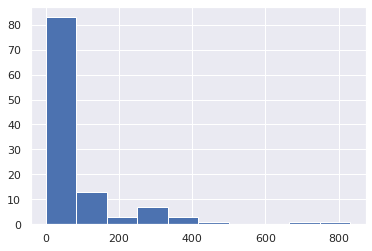

In [100]:
inhibitorActivation.sum().sort_values(ascending=False).hist()

In [101]:
inhibitorActivation.max().sort_values(ascending=False)

nfkb_inhibitor                           730
proteasome_inhibitor                     718
cyclooxygenase_inhibitor                 398
dna_inhibitor                            354
cdk_inhibitor                            316
                                        ... 
tropomyosin_receptor_kinase_inhibitor      6
ubiquitin_specific_protease_inhibitor      6
leukotriene_inhibitor                      6
protein_phosphatase_inhibitor              6
erbb2_inhibitor                            1
Length: 112, dtype: int64

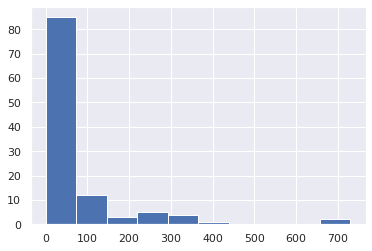

In [102]:
inhibitorActivation.max().sort_values(ascending=False).hist()

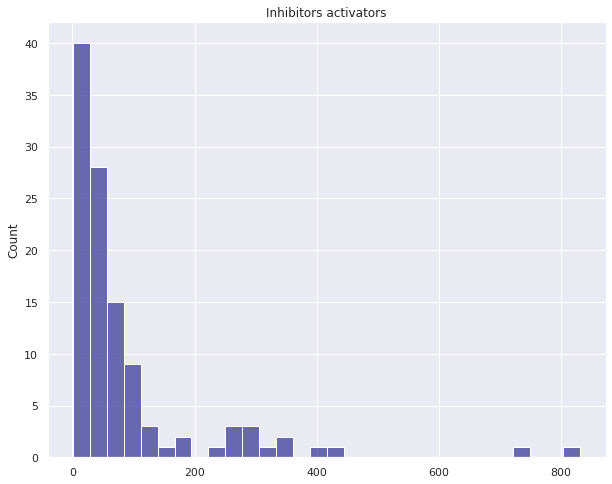

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
cod_inhibitor = inhibitorActivation.sum().sort_values(ascending=False)
ax = sns.histplot(data=cod_inhibitor, color='#3d3d99')
ax.set_title('Inhibitors activators')
plt.show()

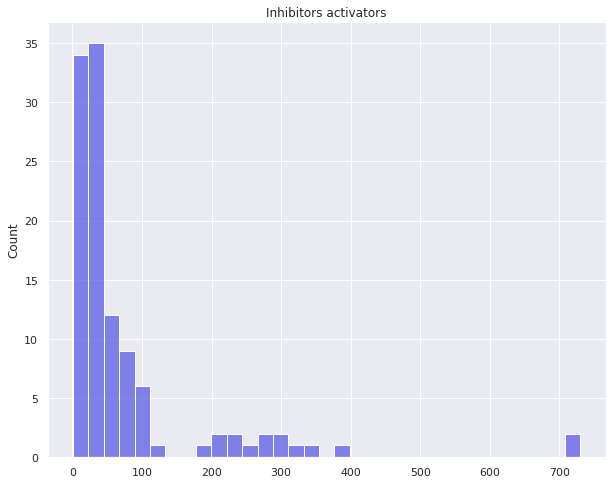

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
cod_inhibitor = inhibitorActivation.max().sort_values(ascending=False)
ax = sns.histplot(data=cod_inhibitor, color="#5c5ce6")
ax.set_title('Inhibitors activators')
ax.set_label("Max inhibitors activators")
plt.show()

## Resposta do Desafio 02: Normalizar o método crosstab pela coluna.

In [105]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [106]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize="columns")

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

##Resposta do Desafio 03: Explorar outros agregadores.

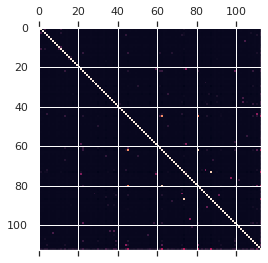

In [107]:
import matplotlib.pyplot as plt

plt.matshow(inhibitorTable.corr(method='pearson'))
plt.show()

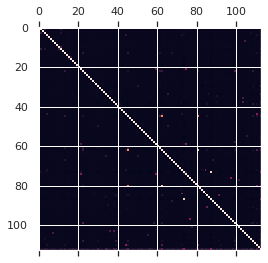

In [108]:
import matplotlib.pyplot as plt

plt.matshow(inhibitorTable.corr(method='kendall'))
plt.show()

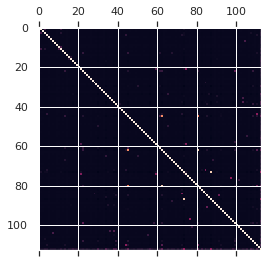

In [109]:
import matplotlib.pyplot as plt

plt.matshow(inhibitorTable.corr(method='spearman'))
plt.show()

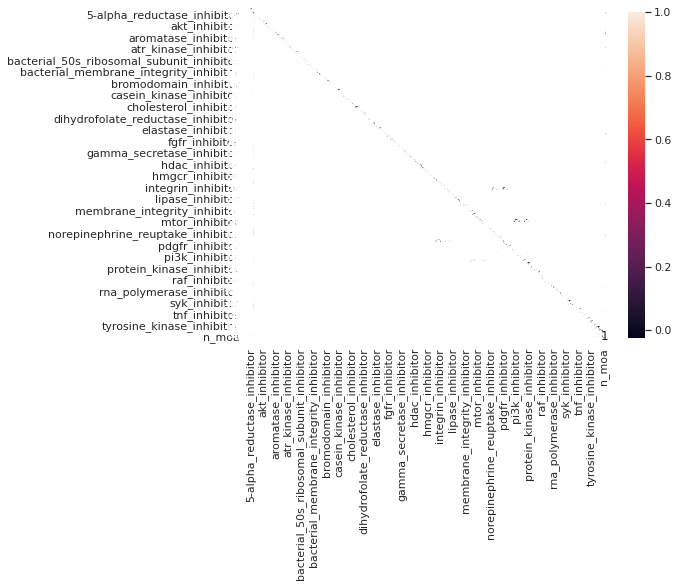

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(inhibitorTable.corr(method='pearson'), annot=True)
plt.show()

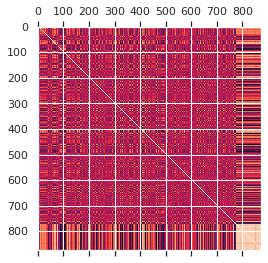

In [111]:
import matplotlib.pyplot as plt

plt.matshow(dados.corr(method='pearson'))
plt.show()

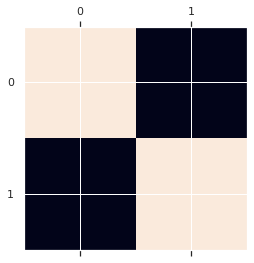

In [112]:
import matplotlib.pyplot as plt

dadosCruzados = pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize=True)

plt.matshow(dadosCruzados.corr(method='pearson'))
plt.show()

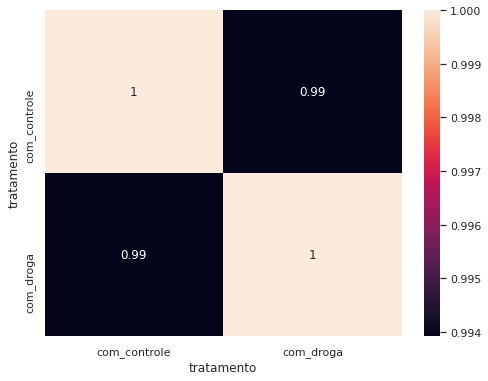

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(dadosCruzados.corr(method='pearson'), annot=True)
plt.show()

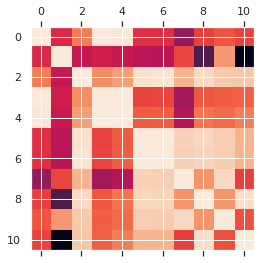

In [114]:
import matplotlib.pyplot as plt

dadosLoc = dados.loc[:, 'g 0':'g 10'].describe()

plt.matshow(dadosLoc.corr(method='pearson'))
plt.show()

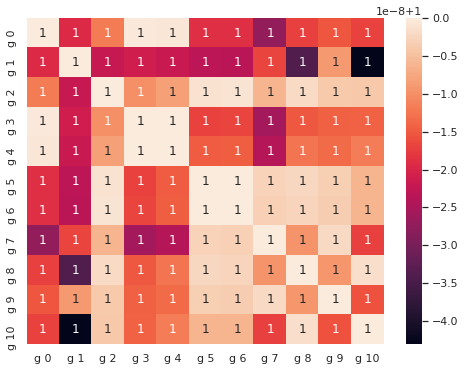

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(dadosLoc.corr(method='pearson'), annot=True)
plt.show()

## Resposta do Desafio 04: Explorar o melt

In [116]:
inhibitorTable.melt()

,variable,value
0,5-alpha_reductase_inhibitor,0
1,5-alpha_reductase_inhibitor,0
2,5-alpha_reductase_inhibitor,0
3,5-alpha_reductase_inhibitor,0
4,5-alpha_reductase_inhibitor,0
...,...,...
2714791,n_moa,0
2714792,n_moa,0
2714793,n_moa,0
2714794,n_moa,1


Não entendi muito bem a utilidade desse método, além de trnasformar todo os dados da tabela em linhas.

## Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

In [117]:
dadosGenes = dados.loc[:, 'g 0':'g 771'].describe()

pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

,g 0,g 1,g 2,g 3,g 4,g 5,g 6,g 7,g 8,g 9,g 10,g 11,g 12,g 13,g 14,g 15,g 16,g 17,g 18,g 19,g 20,g 21,g 22,g 23,g 24,g 25,g 26,g 27,g 28,g 29,g 30,g 31,g 32,g 33,g 34,g 35,g 36,g 37,g 38,g 39,g 40,g 41,g 42,g 43,g 44,g 45,g 46,g 47,g 48,g 49,g 50,g 51,g 52,g 53,g 54,g 55,g 56,g 57,g 58,g 59,g 60,g 61,g 62,g 63,g 64,g 65,g 66,g 67,g 68,g 69,g 70,g 71,g 72,g 73,g 74,g 75,g 76,g 77,g 78,g 79,g 80,g 81,g 82,g 83,g 84,g 85,g 86,g 87,g 88,g 89,g 90,g 91,g 92,g 93,g 94,g 95,g 96,g 97,g 98,g 99,g 100,g 101,g 102,g 103,g 104,g 105,g 106,g 107,g 108,g 109,g 110,g 111,g 112,g 113,g 114,g 115,g 116,g 117,g 118,g 119,g 120,g 121,g 122,g 123,g 124,g 125,g 126,g 127,g 128,g 129,g 130,g 131,g 132,g 133,g 134,g 135,g 136,g 137,g 138,g 139,g 140,g 141,g 142,g 143,g 144,g 145,g 146,g 147,g 148,g 149,g 150,g 151,g 152,g 153,g 154,g 155,g 156,g 157,g 158,g 159,g 160,g 161,g 162,g 163,g 164,g 165,g 166,g 167,g 168,g 169,g 170,g 171,g 172,g 173,g 174,g 175,g 176,g 177,g 178,g 179,g 180,g 181,g 182,g 183,g 184,g 185,g 186,g 187,g 188,g 189,g 190,g 191,g 192,g 193,g 194,g 195,g 196,g 197,g 198,g 199,g 200,g 201,g 202,g 203,g 204,g 205,g 206,g 207,g 208,g 209,g 210,g 211,g 212,g 213,g 214,g 215,g 216,g 217,g 218,g 219,g 220,g 221,g 222,g 223,g 224,g 225,g 226,g 227,g 228,g 229,g 230,g 231,g 232,g 233,g 234,g 235,g 236,g 237,g 238,g 239,g 240,g 241,g 242,g 243,g 244,g 245,g 246,g 247,g 248,g 249,g 250,g 251,g 252,g 253,g 254,g 255,g 256,g 257,g 258,g 259,g 260,g 261,g 262,g 263,g 264,g 265,g 266,g 267,g 268,g 269,g 270,g 271,g 272,g 273,g 274,g 275,g 276,g 277,g 278,g 279,g 280,g 281,g 282,g 283,g 284,g 285,g 286,g 287,g 288,g 289,g 290,g 291,g 292,g 293,g 294,g 295,g 296,g 297,g 298,g 299,g 300,g 301,g 302,g 303,g 304,g 305,g 306,g 307,g 308,g 309,g 310,g 311,g 312,g 313,g 314,g 315,g 316,g 317,g 318,g 319,g 320,g 321,g 322,g 323,g 324,g 325,g 326,g 327,g 328,g 329,g 330,g 331,g 332,g 333,g 334,g 335,g 336,g 337,g 338,g 339,g 340,g 341,g 342,g 343,g 344,g 345,g 346,g 347,g 348,g 349,g 350,g 351,g 352,g 353,g 354,g 355,g 356,g 357,g 358,g 359,g 360,g 361,g 362,g 363,g 364,g 365,g 366,g 367,g 368,g 369,g 370,g 371,g 372,g 373,g 374,g 375,g 376,g 377,g 378,g 379,g 380,g 381,g 382,g 383,g 384,g 385,g 386,g 387,g 388,g 389,g 390,g 391,g 392,g 393,g 394,g 395,g 396,g 397,g 398,g 399,g 400,g 401,g 402,g 403,g 404,g 405,g 406,g 407,g 408,g 409,g 410,g 411,g 412,g 413,g 414,g 415,g 416,g 417,g 418,g 419,g 420,g 421,g 422,g 423,g 424,g 425,g 426,g 427,g 428,g 429,g 430,g 431,g 432,g 433,g 434,g 435,g 436,g 437,g 438,g 439,g 440,g 441,g 442,g 443,g 444,g 445,g 446,g 447,g 448,g 449,g 450,g 451,g 452,g 453,g 454,g 455,g 456,g 457,g 458,g 459,g 460,g 461,g 462,g 463,g 464,g 465,g 466,g 467,g 468,g 469,g 470,g 471,g 472,g 473,g 474,g 475,g 476,g 477,g 478,g 479,g 480,g 481,g 482,g 483,g 484,g 485,g 486,g 487,g 488,g 489,g 490,g 491,g 492,g 493,g 494,g 495,g 496,g 497,g 498,g 499,g 500,g 501,g 502,g 503,g 504,g 505,g 506,g 507,g 508,g 509,g 510,g 511,g 512,g 513,g 514,g 515,g 516,g 517,g 518,g 519,g 520,g 521,g 522,g 523,g 524,g 525,g 526,g 527,g 528,g 529,g 530,g 531,g 532,g 533,g 534,g 535,g 536,g 537,g 538,g 539,g 540,g 541,g 542,g 543,g 544,g 545,g 546,g 547,g 548,g 549,g 550,g 551,g 552,g 553,g 554,g 555,g 556,g 557,g 558,g 559,g 560,g 561,g 562,g 563,g 564,g 565,g 566,g 567,g 568,g 569,g 570,g 571,g 572,g 573,g 574,g 575,g 576,g 577,g 578,g 579,g 580,g 581,g 582,g 583,g 584,g 585,g 586,g 587,g 588,g 589,g 590,g 591,g 592,g 593,g 594,g 595,g 596,g 597,g 598,g 599,g 600,g 601,g 602,g 603,g 604,g 605,g 606,g 607,g 608,g 609,g 610,g 611,g 612,g 613,g 614,g 615,g 616,g 617,g 618,g 619,g 620,g 621,g 622,g 623,g 624,g 625,g 626,g 627,g 628,g 629,g 630,g 631,g 632,g 633,g 634,g 635,g 636,g 637,g 638,g 639,g 640,g 641,g 642,g 643,g 644,g 645,g 646,g 647,g 648,g 649,g 650,g 651,g 652,g 653,g 654,g 655,g 656,g 657,g 658,g 659,g 660,g 661,g 662,g 663,g 664,g 665,g 666,g 667,g 668,g 669,g 670,g 671,g 672,g 673,g 674,g 675,g 676,g 677,g 678,g 679,g 680,g 681,g 682,g 683,g 684

A princípio, estou pensando em obter o valor médio de todos os valores de genes e contrapor com os mesmos das células, e tentar encontrar uma correlação a partir disso. 

## Aula 4: Merge e Análise de Resultados
### Desafio 01: Encontrar o top 10 das ações do MOA (inibidor, agonista,...)
---
### Desafio 02: Cria a coluna chamada eh_controle para quando na linha tratamento for igual a com_controle
---
### Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72
---
### Desafio 04: Estudar sobre combinações DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
---
### Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições. Escolher uma droga e comparar com controle.
---
### Desafio 06: Descobrir se tempo algum composto que dependendo da configuração do experimento, ativa ou não algum MOA.
---
### Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa um MOA diferente.
---
### Desafio 08: Resumir o que você aprendeu.

## Aula 05: Machine Learning e Sci-kit Learning
### Desafio 01: Tentar outros modelos ou mudar os parâmetros dos modelos que testamos na aula.
---
### Desafio 02: Estudar a documentação do Sklearn.
---
### Desafio 03: Pesquisar o fluxograma escolhendo o melhor modelo.
---
### Desafio 04: Testar outras soluções. 0, 1 ou +
---
### Desafio 05: escolha uma droga mais utilizada e tentar criar um modelo para prever essa label.